# The geopack and Tsyganenko models in Python

Developed by: Sheng Tian, Univ. of Minnesota, tianx138@umn.edu

This python geopack has integrated two modules originally written in Fortran: 
- The geopack
- The Tsyganenko models (T89, T96, T01, and T04).

The Fortran geopack08 is available at https://geo.phys.spbu.ru/~tsyganenko/empirical-models/coordinate_systems/geopack

The Fortran Tsyganenko models are available at https://geo.phys.spbu.ru/~tsyganenko/empirical-models/

# Installation

The package requires Python pre-installed and depends on the numpy and scipy packages. I've only tested the Python geopack on Mac OS in Python 3.6. Performance on other platform and other versions of Python is unclear.

To install the Python geopack through pip, type in the terminal: 

`foo@bar:~$ pip3 install geopack`



In [1]:
# Load
import datetime
from dateutil import parser
from geopack import geopack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle

Load IGRF coefficients ...


# The geopack

* recalc: Re-calculate the dipole tilt angle (and other internal parameters) for a given **time**.

In [2]:

# ----------------------------------------------------------------
# Time and Solar Wind velocicty GSE
# ----------------------------------------------------------------
t1 = datetime.datetime(2001,1,2,3,4,5)
t0 = datetime.datetime(1970,1,1)
ut = (t1-t0).total_seconds()
vgse = [-400,0,10]                 # solar wind velocity in GSE.


# -----------------------------------------------------------------
# Recalc
# -----------------------------------------------------------------
'''
ps =  geopack.geopack.recalc(ut)

Input
    ut: The given time in the universal time in second.
    vxgse,vygse,vzgse: The solar wind velocity in GSE. If they are omitted, a default value of [-400,0,0] is used

Return
    ps: Dipole tilt angle in radian (defined in GSM, not GSW)
    
'''

ps =  geopack.recalc(ut)
ps =  geopack.recalc(ut, vgse[0],vgse[1],vgse[2])
# or urse ps = geopack.recalc(ut, *vgse) 
ps

-0.5608233361157049

# The Tsyganenko models

Four models (T89, T96, T01, and T04) developed by Dr. Tsyganenko are implemented in the package.

`bxgsm,bygsm,bzgsm = geopack.t96(par, ps, xgsm, ygsm, zgsm)`

```python
'''
Input:
    par: Is different for each model
    ps:  Dipole tilt angle in radian
    xgsm, ygsm, zgsm: The given position in cartesian GSM coordinate in Re

Return: 
    bxgsm, bygsm, bzgsm: The external magnetic field from the Txx model for a given position and time, in the GSM coordinate
    
'''
```
 

<hr>

* `t89:` Calculate the external magnetic field from the T89 model for a given position and time, in the GSM coordinate.
 
    - **par:** A model parameter. It is an integer (1-7) maps to the Kp index
  
| par | 1    | 2       | 3       | 4       | 5       | 6       | 7       |
|-----:|:------|---------|---------|---------|---------|---------|---------|
| Kp  | 0,0+ | 1-,1,1+ | 2-,2,2+ | 3-,3,3+ | 4-,4,,+ | 5-,5,5+ | > 6-    |
  
  
<hr>

* `t96:` Calculate the external magnetic field from the T96 model for a given position and time, in the GSM coordinate.

    + **par:** A model paramter. It is a 10-element array, whose elements are (1-10)
    + **Pdyn:** is the solar wind dynamic pressure in nPa
    + **Dst:** is the Dst index in nT
    + **ByImf, BzImf:** are the y and z components of the IMF (interplanetary magnetif field) in GSM.
  
| par | 1    | 2       | 3-4         | 5-10    |
|-----|------|---------|-----------  |---------|
| Var | Pdyn | Dst     | ByIMF,BzIMF | not used|



<hr>

* `t01:` Calculate the external magnetic field from the T01 model for a given position and time, in the GSM coordinate.
        
    - **par:** A model paramter. It is a 10-element array, whose elements are (1-10)
    - **Pdyn:** is the solar wind dynamic pressure in nPa
    - **Dst:** is the Dst index in nT
    - **ByImf, BzImf:** are the y and z components of the IMF (interplanetary magnetif field) in GSM
    - **G1,G2:** are two indices defined in Tsyganenko (2001).[https://rbsp-ect.newmexicoconsortium.org/data_pub/QinDenton/]
  
| par |  1   |  2  |     3-4     |  5-6  |   7-10   |
|-----|------|-----|-------------|-------|----------|
| Var | Pdyn | Dst | ByIMF,BzIMF | G1,G2 | not used |
  

<hr>

* `t04:` Calculate the external magnetic field from the T04 model for a given position and time, in the GSM coordinate.

    - **par:** A model paramter. It is a 10-element array, whose elements are (1-10)
    - **Pdyn:** is the solar wind dynamic pressure in nPa
    - **Dst:** is the Dst index in nT
    - **ByImf, BzImf:** are the y and z components of the IMF (interplanetary magnetif field) in GSM
    - **W1,W2,...,W6:** are six indices defined in Tsyganenko (2005). https://rbsp-ect.newmexicoconsortium.org/data_pub/QinDenton/
  
| par |  1   |  2  |     3-4     |   5-10   |
|-----|------|-----|-------------|----------|
| Var | Pdyn | Dst | ByIMF,BzIMF | W1 to W6 |


`Note: All 4 models share the same interface, but the meanings of par are very different.`

# Example 1: Calculate the external magnetic field

Calculate the external magnetic field from the Tsyganenko model for a given position and time, in the GSM coordinate.

In [3]:
# GSM position
x_gsm,y_gsm,z_gsm = [-5, 0, 0.5]   # in Re

bxgsm,bygsm,bzgsm = geopack.t89.t89(2, ps, x_gsm, y_gsm, z_gsm)

print("Bxgsm: {:.2f}\nBygsm: {:.2f}\nBzgsm: {:.2f}".format(bxgsm,bygsm,bzgsm))

Bxgsm: 27.69
Bygsm: 0.00
Bzgsm: -20.65


# Example 2 : Trace along model magnetic fields: trace



`x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=1,parmod=2,exname='t89',inname='igrf',maxloop=10000)`

```python
'''
Input:

    - x0gsm,y0gsm,z0gsm: The given position in cartesian GSM coordinate in Re (earth radii, 1 Re = 6371.2 km).
    - dir:               Direction of tracing. dir = -1 for parallel; dir = 1 for anti-parallel.
    - rlim:              Maximum tracing radius in Re. Default value is 10 Re.
    - r0:                Minimum tracing radius in Re. Default value is 1 Re.
    - inname:            A string specifies the internal model, one of 'dipole','igrf'. The default value is 'igrf'.
    - exname:            A string specifies the external model, one of 't89','t96','t01','t04'.
                         The default value is 't89' and its par is default to be 2.
    - par:               The model parameter. Its dimension and the meaning depend on the external model. 

Return: 

    - x,y,z: footprint at r0
    - xx, yy, zz: trace of the field line
'''
```

## Calculate the trace

In [4]:
# obtain ps
t1 = datetime.datetime(2001,1,2,3,4,5)
t0 = datetime.datetime(1970,1,1)
ut = (t1-t0).total_seconds()
vgse = [-400,0,10]  

ps = geopack.recalc(ut, vgse[0],vgse[1],vgse[2])

# GSM position
x_gsm,y_gsm,z_gsm = [-5, 0, 0.5]   # in Re

# Tsyganenko T96
model = 't96'
par = [2.06, -0.5, 1.3, -1.8, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan] # 10 values
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)


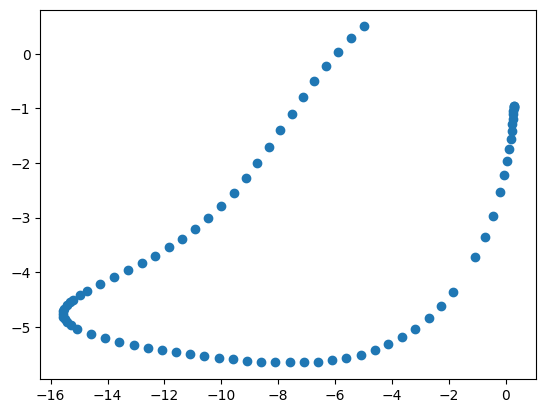

In [5]:
# simple plot

plt.scatter(xx,zz)

## Define some plot functions

In [6]:

def dual_half_circle(center=(0,0), radius=1, angle=90, ax=None, colors=('w','k','k'),
                     **kwargs):
    """
    Add two half circles to the axes *ax* (or the current axes) with the 
    specified facecolors *colors* rotated at *angle* (in degrees).
    """
    if ax is None:
        ax = plt.gca()
    theta1, theta2 = angle, angle + 180
    #w1 = Wedge(center, radius, theta1, theta2, fc=colors[0], **kwargs)
    #w2 = Wedge(center, radius, theta2, theta1, fc=colors[1], **kwargs)
    
    w1 = Wedge(center, radius, theta1, theta2, fc=colors[1], **kwargs)
    w2 = Wedge(center, radius, theta2, theta1, fc=colors[0], **kwargs)
   
    cr = Circle(center, radius, fc=colors[2], fill=False, **kwargs)
    for wedge in [w1, w2, cr]:
        ax.add_artist(wedge)
    return [w1, w2, cr]

def setup_fig(ax, xlim=(10,-25),ylim=(-10,10), plane = 'xz'):
    """
    Setup a figure with defined limits in any x, y or z direction
    also implements dual_half_circle to include day/night circle 
    """
    ax.axvline(0,ls=':',color='k')
    ax.axhline(0,ls=':',color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    if plane == 'xy':
        xlabel='X GSM [Re]'
        ylabel='Y GSM [Re]'
    elif plane == 'xz':
        xlabel='X GSM [Re]'
        ylabel='Z GSM [Re]'
    else:
        print('Define a correct plane: xy, xz')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_aspect('equal')
    w1,w2,cr = dual_half_circle(ax=ax)
    
    return ax


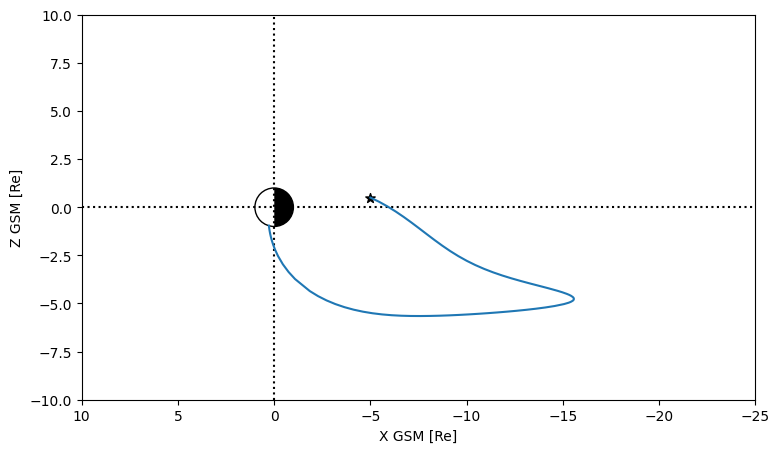

In [7]:
# make same plot
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(111)
ax=setup_fig(ax, xlim=(10,-25),ylim=(-10,10), plane = 'xz')

# x, y , z point in the dayside
ax.scatter(x_gsm, z_gsm , marker = '*', s = 50, c = 'k')
ax.plot(xx,zz)
plt.show()

## Other examples

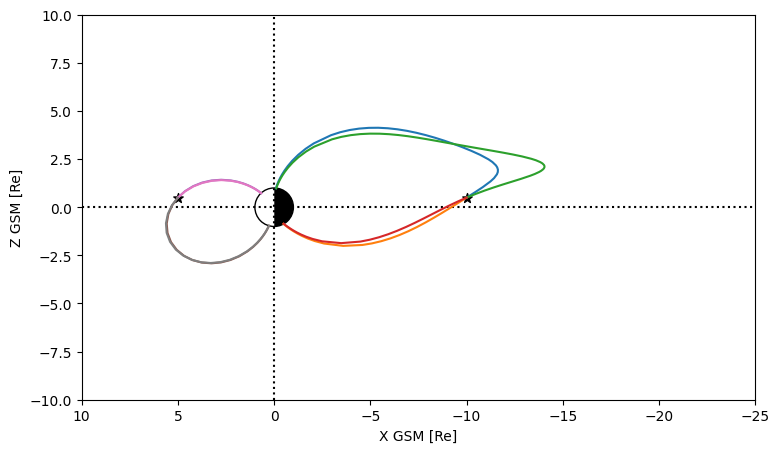

In [8]:
# obtain ps
t1 = datetime.datetime(2001,6,15,3,4,5)
t0 = datetime.datetime(1970,1,1)
ut = (t1-t0).total_seconds()
x_gsm,y_gsm,z_gsm = [-10, 0, 0.5]   # in Re
vgse = [-400,0,10]  

ps = geopack.recalc(ut, vgse[0],vgse[1],vgse[2])

# Setup figure
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(111)
ax=setup_fig(ax, xlim=(10,-25),ylim=(-10,10), plane = 'xz')

# x, y , z point
plt.scatter(x_gsm, z_gsm , marker = '*', s = 50, c = 'k')

# Tsyganenko T89
model = 't89'
par = 1
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

# Tsyganenko T96
model = 't96'
par = [2.06, -0.5, 1.3, -1.8, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan] # 10 values
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)


# plot another example
# x, y , z point in the dayside
x_gsm,y_gsm,z_gsm = [5, 0, 0.5]   # in Re
plt.scatter(x_gsm, z_gsm , marker = '*', s = 50, c = 'k')

# Tsyganenko T89
model = 't89'
par = 1
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

# Tsyganenko T96
model = 't96'
par = [2.06, -0.5, 1.3, -1.8, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan] # 10 values
x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=-1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=1,rlim=100,r0=.99999,parmod=par,exname=model,inname='igrf',maxloop=10000)
ax.plot(xx,zz)

plt.show()

# Plot footprint at Earth

In [ ]:
%matplotlib inline

import cartopy.crs as ccrs


from spacepy import coordinates as coord
from spacepy.time import Ticktock
import spacepy as spc


coord.DEFAULTS.set_values(use_irbem=False, itol=5)

cvals = coord.Coords([x,y,z], 'GSM', 'car')
cvals.ticks = Ticktock(t1, 'ISO') # add ticks
print(t1)
print(cvals.ticks)
newcoord = cvals.convert('GDZ', 'sph')

alt_N = newcoord.data[:,0]
lat_N = newcoord.data[:,1]
lon_N = newcoord.data[:,2]

print(lat_N, lon_N)
# From CartoPy Example: https://scitools.org.uk/cartopy/docs/latest/gallery/aurora_forecast.html#sphx-glr-gallery-aurora-forecast-py
fig = plt.figure(figsize=[12, 12])

projection = ccrs.Orthographic(180, -90)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1, projection=projection)
ax.coastlines(zorder=3)
ax.stock_img()
ax.gridlines()

pxx,pyy = projection.transform_point(lon_N, lat_N,ccrs.Geodetic())

ax.scatter([pxx],[pyy],marker='*',facecolor='y',edgecolor='k',s=500)
ax.set_extent([0, 359.9999, -90, -50],crs=ccrs.PlateCarree())
plt.show()


2001-06-15 03:04:05
Ticktock( [datetime.datetime(2001, 6, 15, 3, 4, 5)], dtype=UTC)
[-51.00888971] [129.54642715]
